<a href="https://colab.research.google.com/github/Amy-0502/MyPython/blob/main/%E3%80%8CDeepLearning11_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#使用gdown套件存取google drive
!mkdir -p cat_dog_bird_train
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6


In [ ]:
#下載圖片至VM端
url='https://drive.google.com/file/d/1qbxK-iKtWNZeWhyJDD6gxJis7V2nhNPQ/view?usp=sharing'
output='cat_dog_bird_train/PetImages.zip'

import gdown
gdown.download(url=url,output=output,quiet=False,fuzzy=True)

Downloading...
From (uriginal): https://drive.google.com/uc?id=1qbxK-iKtWNZeWhyJDD6gxJis7V2nhNPQ
From (redirected): https://drive.google.com/uc?id=1qbxK-iKtWNZeWhyJDD6gxJis7V2nhNPQ&confirm=t&uuid=3c4302c2-9086-4f7b-9bd1-d7decfd9bbbd
To: /content/cat_dog_bird_train/PetImages.zip
100%|██████████| 2.75G/2.75G [00:42<00:00, 64.2MB/s]


'cat_dog_bird_train/PetImages.zip'

In [ ]:
#解壓縮圖片檔，會產生兩個目錄分別是 Cat 與 Dog
!unzip cat_dog_bird_train/PetImages.zip -d cat_dog_bird_train

串流輸出內容已截斷至最後 5000 行。
  inflating: cat_dog_bird_train/PetImages/dog/116.jpg  
  inflating: cat_dog_bird_train/PetImages/dog/1160.jpg  
  inflating: cat_dog_bird_train/PetImages/dog/1161.jpg  
  inflating: cat_dog_bird_train/PetImages/dog/1162.jpg  
  inflating: cat_dog_bird_train/PetImages/dog/1163.jpg  
  inflating: cat_dog_bird_train/PetImages/dog/1164.jpg  
  inflating: cat_dog_bird_train/PetImages/dog/1165.jpg  
  inflating: cat_dog_bird_train/PetImages/dog/1166.jpg  
  inflating: cat_dog_bird_train/PetImages/dog/1167.jpg  
  inflating: cat_dog_bird_train/PetImages/dog/1168.jpg  
  inflating: cat_dog_bird_train/PetImages/dog/1169.jpg  
  inflating: cat_dog_bird_train/PetImages/dog/117.jpg  
  inflating: cat_dog_bird_train/PetImages/dog/1170.jpg  
  inflating: cat_dog_bird_train/PetImages/dog/1171.jpg  
  inflating: cat_dog_bird_train/PetImages/dog/1172.jpg  
  inflating: cat_dog_bird_train/PetImages/dog/1173.jpg  
  inflating: cat_dog_bird_train/PetImages/dog/1174.jpg  
  inflating:

In [ ]:
#在colab環境中，安裝conda
!pip install -q condacolab

In [ ]:
import condacolab

condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:11
🔁 Restarting kernel...


In [ ]:
#檢查conda版本
!conda --version

conda 22.11.1


In [ ]:
#檢查conda安裝位置

!which conda

/usr/local/bin/conda


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
#檢查tensorflow版本
#tensorflow版本與keras版本同步

tf.__version__

'2.12.0'

In [ ]:
#初始化圖片大小
image_size = (180, 180)
batch_size = 32

#image_size: 圖片讀取的大小

#batch_size: 把資料分成一堆堆，分別丟入類神經網路中訓練，而非全部一起丟進去訓練。
#舉例來說，今天有100筆資料，我設定Batch size=10，也就是一次只輸入10筆資料進類神經網路中，這動作進行10次之後，才會是1個Epoch

#訓練圖片集
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "cat_dog_bird_train/PetImages",
    #將80%圖片數量作為訓練資料集
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

#驗證資料集
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "cat_dog_bird_train/PetImages",
    #將20%圖片數量作為驗證資料集
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

print("系統依照subset名稱作為訓練與驗證的區分")

In [ ]:
#訓練資料集內的類別種類，依照順序Cat為0，Dog為1
print("class name:",train_ds.class_names)

class name: ['bird', 'cat', 'dog']


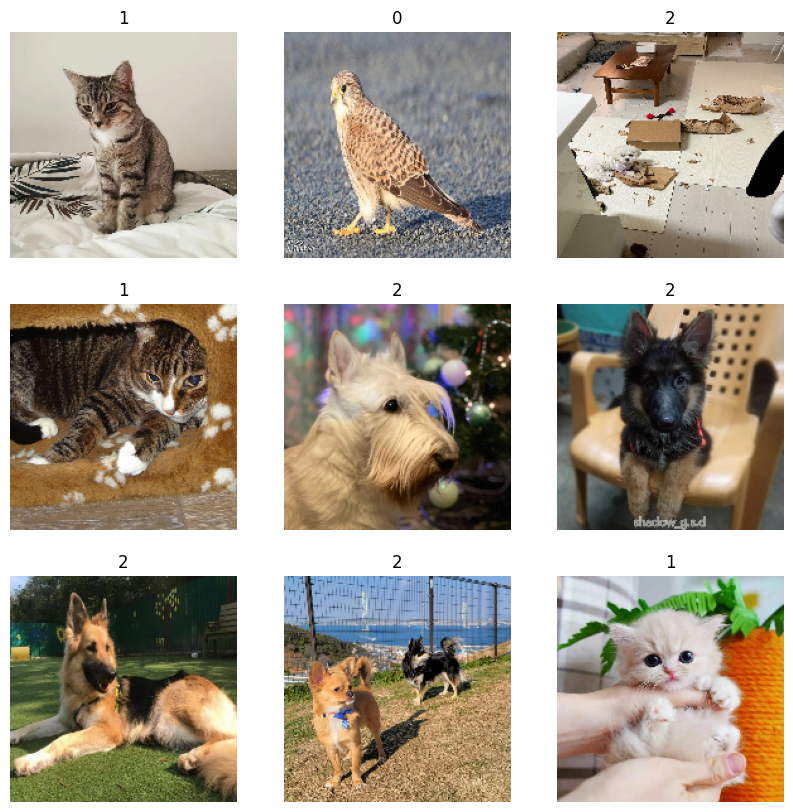

In [ ]:
#檢視圖片集內容

import matplotlib.pyplot as plt

#檢視圖片大小
plt.figure(figsize=(10, 10))

#a batch_size of images
for images, labels in train_ds.take(1):
    #檢視9張圖片
    for i in range(9):
        #圖片呈現以3x3的方式
        ax = plt.subplot(3, 3, i + 1)
        #轉換為uint8用於呈現圖片
        plt.imshow(images[i].numpy().astype("uint8"))
        #打印圖片種類編號於圖片上方，
        plt.title(int(labels[i]))
        plt.axis("off")

In [ ]:
from keras.applications.vgg16 import VGG16
import keras.utils as image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

In [ ]:
#影像資料增補(data_augmentation)，增加圖片的豐富度
#Keras支援垂直翻轉(horizontal_and_vertical)、偏上/下(height_shift_range)
#偏左/右(width_shift_range)、放大/縮小(zoom_range)、明亮度調整(brightness_range)

data_augmentation = keras.Sequential(
    [
        #採用水平/垂直
        layers.RandomFlip("horizontal_and_vertical"),
        layers.RandomRotation(0.1),
    ]
)

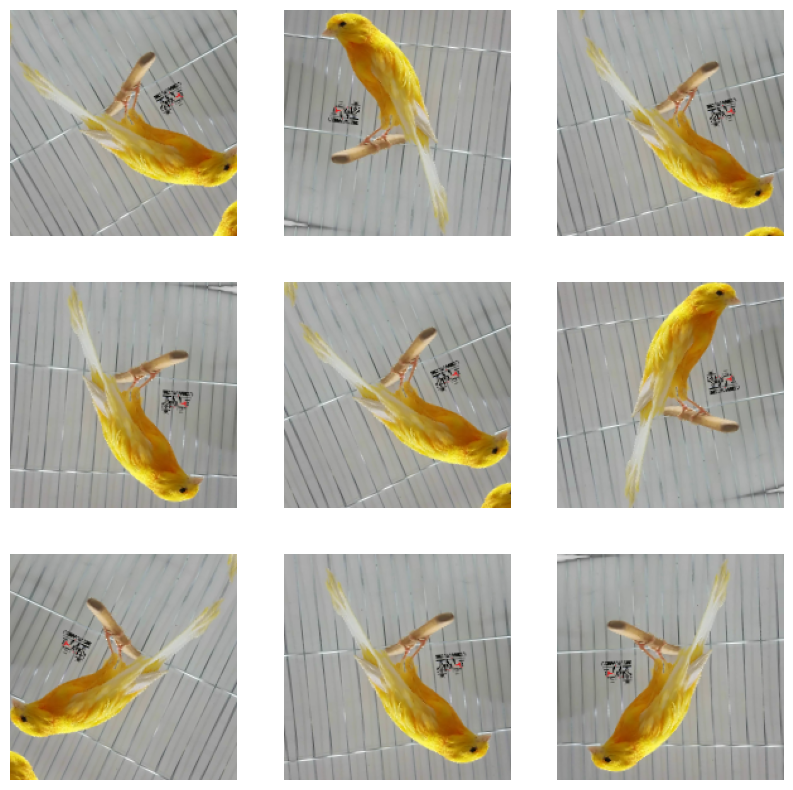

In [ ]:
#檢視影像資料增補

#檢視圖片大小
plt.figure(figsize=(10, 10))

#a batch_size of images
for images, _ in train_ds.take(1):
    #檢視9張圖片
    for i in range(9):
        #採取影像資料增補
        augmented_images = data_augmentation(images)
        #圖片呈現以3x3的方式
        ax = plt.subplot(3, 3, i + 1)
        #轉換為uint8用於呈現圖片
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

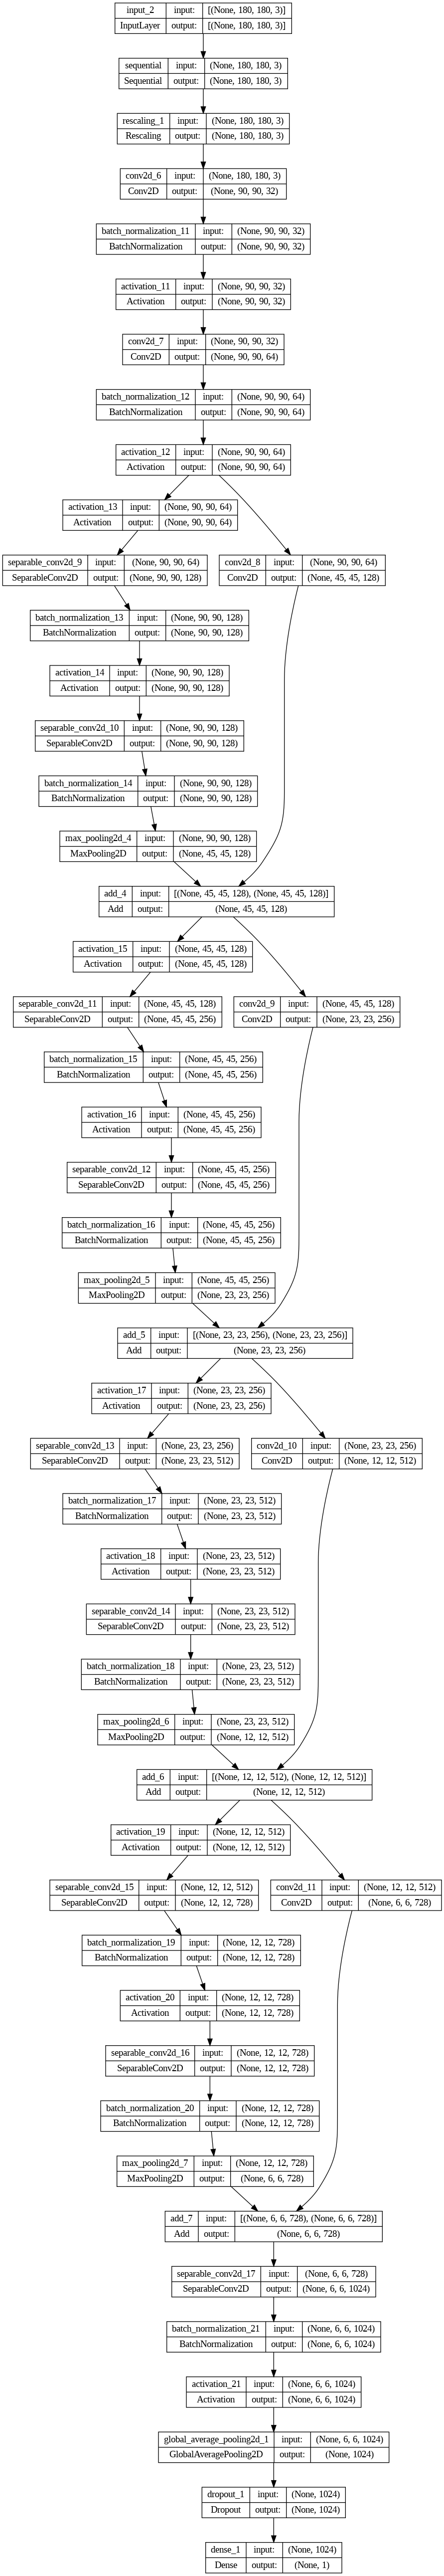

In [ ]:
#定義圖片分類模型建置函數

#input_shape: 輸入圖片的大小(若為彩色需增加一個維度為3，因為RGB共3個)
#num_classes: 圖片種類數量
def make_model(input_shape, num_classes):
    #例如input_shape輸入為 (180,180,3)
    inputs = keras.Input(shape=input_shape)
    
    #影像資料增補
    x = data_augmentation(inputs)

    # Entry block
    #輸入的每一個像素為0~255，除以255表示正規化，最終輸出值為0~1
    x = layers.Rescaling(1.0 / 255)(x)

    #filters:32
    #kernal_size:3
    #padding: valid or same, valid means no padding, same means padding with zeros

    #建立一層捲積層(Conv2D)
    x = layers.Conv2D(32, 3, strides=2, padding="same")(x)
    #輸入圖片數據時，先將特徵值進行做normalize後再進行訓練，可以加速模型收斂
    #Batch Normalization就是每一層輸入都做一次normalize
    x = layers.BatchNormalization()(x)
    #定義激活函數為relu
    x = layers.Activation("relu")(x)

    #建立一層捲積層(Conv2D)
    x = layers.Conv2D(64, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    #保存目前的x
    previous_block_activation = x  

    #針對不同的size建立卷積層
    for size in [128, 256, 512, 728]:
        x = layers.Activation("relu")(x)
        #SeparableConv2D: 建立可分離的卷積層
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        #SeparableConv2D: 再建立可分離的卷積層
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)
        #pool_size:3 (3X3) pool window
        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        #建立一層捲積層(Conv2D)，以之前保留的x作為輸入值
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  #結合可分離的卷積層
        previous_block_activation = x  #再將結合後的x作為輸入值

    #經過可分離卷積層後，再獨立建立size為1024的分離卷積層，
    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    #進行最終的Pooling
    x = layers.GlobalAveragePooling2D()(x)

    #種類為2種，分別是Cat與Dog
    if num_classes == 2:
        #二元分類採取sigmoid即可
        activation = "sigmoid"
        units = 1
    else:
        #for multi-classes classification last layer use softmax
        activation = "softmax"
        units = num_classes

    #50%的權重低的神經元將被消滅
    x = layers.Dropout(0.5)(x)

    #Dense: 表示建立一個full-connected的類神經網路
    #units: Positive integer, dimensionality of the output space.
    outputs = layers.Dense(units, activation=activation)(x)
       
    return keras.Model(inputs, outputs)


model = make_model(input_shape=image_size + (3,), num_classes=2)
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
#初始化設定
epochs = 10

#儲存模型參數檔案，每一次epoch都會產生一個參數檔案
callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
]

#模型編譯
model.compile(
    #學習率(learning_rate)設定為0.001
    optimizer=keras.optimizers.Adam(0.001),
    #二元圖片分類採用
    #loss="binary_crossentropy",
    #非二元圖片分類採用下列方式
    loss="categorical_crossentropy",
    #loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)
model.fit(
    train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds
)

Epoch 1/10
334/334 [==============================] - 2441s 7s/step - loss: 0.0000e+00 - accuracy: 0.4828 - val_loss: 0.0000e+00 - val_accuracy: 0.4149
Epoch 2/10
334/334 [==============================] - 2445s 7s/step - loss: 0.0000e+00 - accuracy: 0.4855 - val_loss: 0.0000e+00 - val_accuracy: 0.3786
Epoch 3/10
334/334 [==============================] - 2450s 7s/step - loss: 0.0000e+00 - accuracy: 0.4838 - val_loss: 0.0000e+00 - val_accuracy: 0.3396
Epoch 4/10
334/334 [==============================] - 2429s 7s/step - loss: 0.0000e+00 - accuracy: 0.4869 - val_loss: 0.0000e+00 - val_accuracy: 0.4374
Epoch 5/10
334/334 [==============================] - 2462s 7s/step - loss: 0.0000e+00 - accuracy: 0.4898 - val_loss: 0.0000e+00 - val_accuracy: 0.3906
Epoch 6/10
334/334 [==============================] - 2466s 7s/step - loss: 0.0000e+00 - accuracy: 0.4877 - val_loss: 0.0000e+00 - val_accuracy: 0.3861
Epoch 7/10
334/334 [==============================] - 2469s 7s/step - loss: 0.0000e+00 -

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


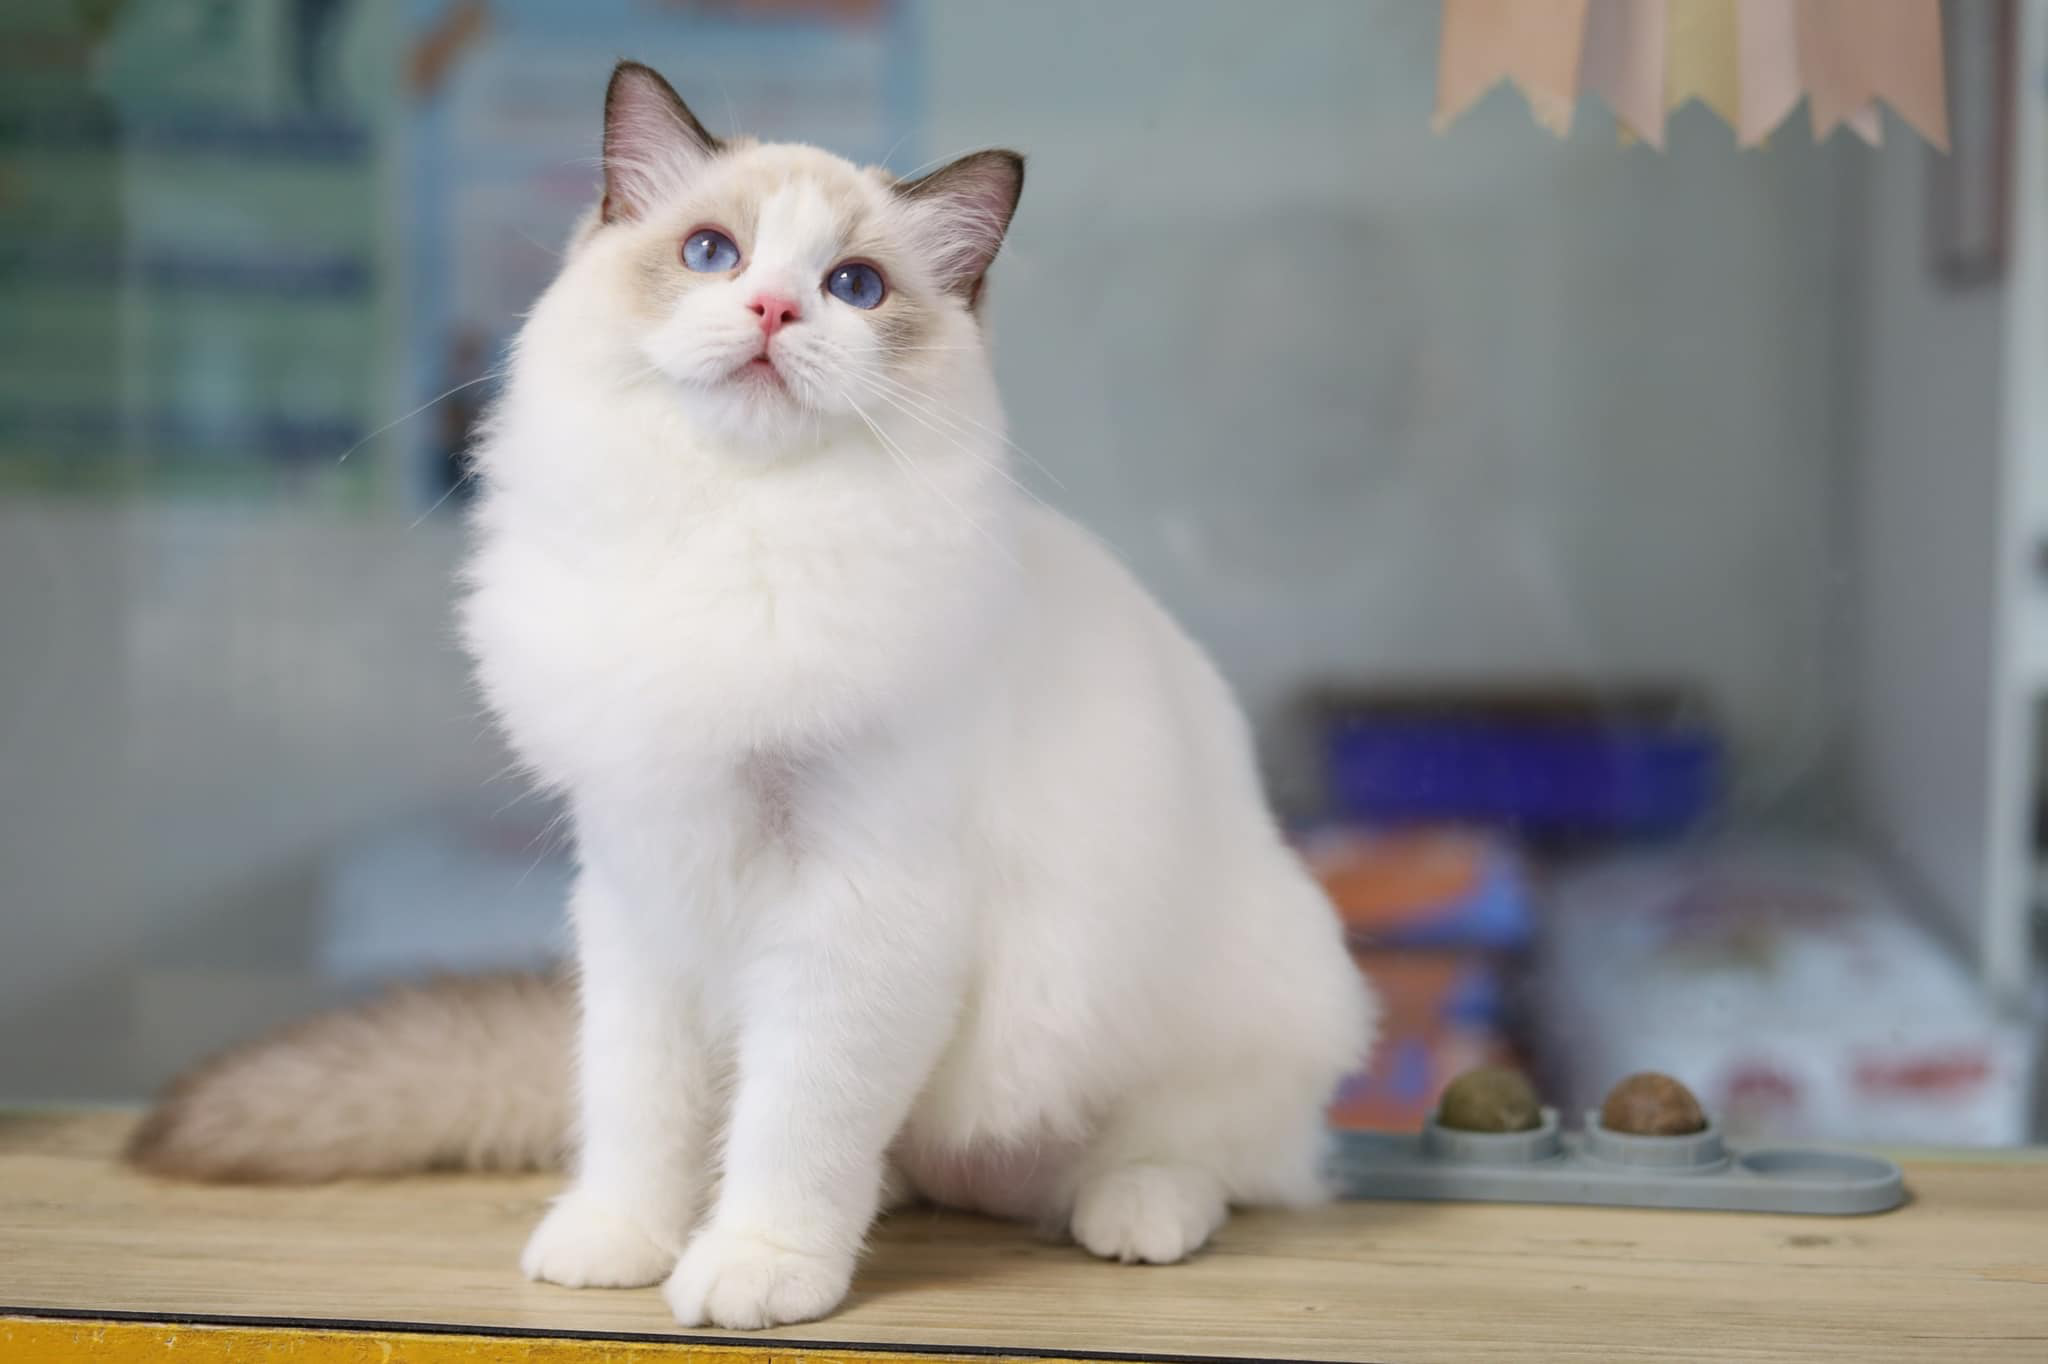

1/1 [==============================] - 0s 81ms/step
This image is 100.00 percent cat and 0.00 percent dog.


In [ ]:
#Run inference on new data
from google.colab import drive
from PIL import Image
drive.mount('/content/gdrive') # 此處需要登入google帳號
img=Image.open('/content/gdrive/MyDrive/Colab Notebooks/MyPet/cat1.jpg')
img.show()
img = keras.preprocessing.image.load_img(
    #建立Cat1目錄，並上傳一張新的貓咪的圖片，取名為my_cat.jpg
    "/content/gdrive/MyDrive/Colab Notebooks/MyPet/cat1.jpg", target_size=image_size
)
#img_to_array:上傳的新圖片需要轉換為numpy格式
img_array = keras.preprocessing.image.img_to_array(img)
#expand_dims: 為符合圖片要求，numpy格式的新圖片需要擴充一個維度
img_array = tf.expand_dims(img_array, 0) 

#inference圖片種類
predictions = model.predict(img_array)

score = predictions[0]
print(
    "This image is %.2f percent cat and %.2f percent dog."
    % (100 * (1 - score), 100 * score)
)

In [ ]:
#儲存模型目錄為my_model
#my_model目錄可以備份回google drive，以便後續使用

model.save('my_model')

INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


In [ ]:
#假設新開一個colab，可以將先前存在google drive的模型檔案 my_model拉過來
#讀取 my_model 模型檔案

new_model = tf.keras.models.load_model('my_model')

#檢視模型結構
#注意觀察模型參數數量: 2,782,649
new_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 sequential (Sequential)        (None, 180, 180, 3)  0           ['input_2[0][0]']                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 180, 180, 3)  0           ['sequential[0][0]']             
                                                                                                  
 conv2d_6 (Conv2D)              (None, 90, 90, 32)   896         ['rescaling_1[0][0]']      

In [ ]:
#如果不想存整個目錄，也可以存模型檔案
model.save('my_model.h5')
#讀取模型檔案
new_model1 = tf.keras.models.load_model('my_model.h5')

In [ ]:
#check its architecture
new_model1.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 sequential (Sequential)        (None, 180, 180, 3)  0           ['input_2[0][0]']                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 180, 180, 3)  0           ['sequential[0][0]']             
                                                                                                  
 conv2d_6 (Conv2D)              (None, 90, 90, 32)   896         ['rescaling_1[0][0]']      

In [ ]:
#再次inference貓咪圖片，看看結果有沒有差別
img = keras.preprocessing.image.load_img(
    "/content/gdrive/MyDrive/Colab Notebooks/MyPet/cat1.jpg", target_size=image_size
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = new_model1.predict(img_array)
score = predictions[0]
print(
    "This image is %.2f percent cat and %.2f percent dog."
    % (100 * (1 - score), 100 * score)
)

1/1 [==============================] - 0s 311ms/step
This image is 100.00 percent cat and 0.00 percent dog.
